In [243]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns
import datetime

# Set data files
americans_sleep_data_file = "resources/2003-2017_time americans_spend_sleeping.csv"
employee_attrition_data_file = "resources/employee_attrition.csv" # not used
sleep_efficiency_data_file = "resources/Sleep_Efficiency.csv"
male_sleep_data_file = "resources/20191001-20200731_male_sleep.csv"
female_sleep_data_file = "resources/20191015-20200729_jb_fitbit_sleep.csv"


# Read data files
americans_sleep = pd.read_csv(americans_sleep_data_file)
employee_attrition = pd.read_csv(employee_attrition_data_file)
sleep_efficiency = pd.read_csv(sleep_efficiency_data_file)
male_sleep = pd.read_csv(male_sleep_data_file)
female_sleep = pd.read_csv(female_sleep_data_file)


In [244]:
# look at sleep_efficiency values
sleep_efficiency.head()


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [245]:
# check for null values
sleep_efficiency.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [246]:
# drop columns with null values that aren't useful
sleep_efficiency.drop(columns=["ID","Caffeine consumption","Alcohol consumption","Smoking status","Exercise frequency"],inplace=True)
sleep_efficiency.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0


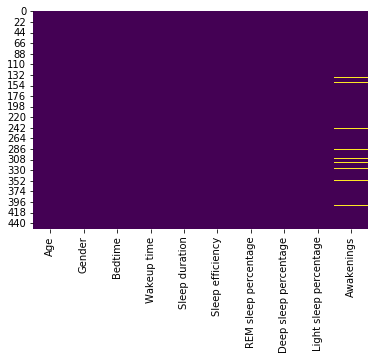

In [247]:
# check to see the amount of data that is missing to make decisions whether to drop these missing values or to replace them
sns.heatmap(sleep_efficiency.isnull(),cbar=False,cmap='viridis')

In [248]:
# replace missing values with mean
num_col = ['Awakenings']
for col in num_col:
    sleep_efficiency[col]=pd.to_numeric(sleep_efficiency[col])
    sleep_efficiency[col].fillna(sleep_efficiency[col].mean(), inplace=True)
sleep_efficiency.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0


In [249]:
# check if any null values remain
sleep_efficiency.isnull().sum()

Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
dtype: int64

In [250]:
# split date and time in the Bedtime column
se_st = sleep_efficiency["Bedtime"]
se_split = se_st.str.split(expand=True)
se_split.columns = ['startDate', 'startTime']
se_split.head()

,startDate,startTime
0,2021-03-06,01:00:00
1,2021-12-05,02:00:00
2,2021-05-25,21:30:00
3,2021-11-03,02:30:00
4,2021-03-13,01:00:00


In [251]:
# split date and time in the Wakeup time column
se_et = sleep_efficiency["Wakeup time"]
wt_split = se_et.str.split(expand=True)
wt_split.columns = ['endDate', 'endTime']
wt_split.head()

,endDate,endTime
0,2021-03-06,07:00:00
1,2021-12-05,09:00:00
2,2021-05-25,05:30:00
3,2021-11-03,08:30:00
4,2021-03-13,09:00:00


In [252]:
# create a new dataframe for split columns
se_split_df = pd.DataFrame().assign(startDate=se_split['startDate'],startTime=se_split['startTime'],endDate=wt_split['endDate'],\
                                 endTime=wt_split['endTime'],)
se_split_df.head()

,startDate,startTime,endDate,endTime
0,2021-03-06,01:00:00,2021-03-06,07:00:00
1,2021-12-05,02:00:00,2021-12-05,09:00:00
2,2021-05-25,21:30:00,2021-05-25,05:30:00
3,2021-11-03,02:30:00,2021-11-03,08:30:00
4,2021-03-13,01:00:00,2021-03-13,09:00:00


In [253]:
# drop old start/end time columns
sleep_efficiency.drop(columns=["Bedtime","Wakeup time"],inplace=True)
sleep_efficiency.head()

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings
0,65,Female,6.0,0.88,18,70,12,0.0
1,69,Male,7.0,0.66,19,28,53,3.0
2,40,Female,8.0,0.89,20,70,10,1.0
3,40,Female,6.0,0.51,23,25,52,3.0
4,57,Male,8.0,0.76,27,55,18,3.0


In [254]:
# create new dataframe with new split columns
sleep_efficiency_new = pd.DataFrame().assign(Age=sleep_efficiency['Age'], Gender=sleep_efficiency['Gender'],\
                                        SleepDuration=sleep_efficiency['Sleep efficiency'], REMSleepPerc=sleep_efficiency['REM sleep percentage'],\
                                        DeepSleepPerc=sleep_efficiency['Deep sleep percentage'],LightSleepPerc=sleep_efficiency['Light sleep percentage'],\
                                        Awakenings=sleep_efficiency['Awakenings'], StartDate=se_split['startDate'],StartTime=se_split['startTime'],\
                                        EndDate=wt_split['endDate'],EndTime=wt_split['endTime']
                                        )
sleep_efficiency_new.head()

,Age,Gender,SleepDuration,REMSleepPerc,DeepSleepPerc,LightSleepPerc,Awakenings,StartDate,StartTime,EndDate,EndTime
0,65,Female,0.88,18,70,12,0.0,2021-03-06,01:00:00,2021-03-06,07:00:00
1,69,Male,0.66,19,28,53,3.0,2021-12-05,02:00:00,2021-12-05,09:00:00
2,40,Female,0.89,20,70,10,1.0,2021-05-25,21:30:00,2021-05-25,05:30:00
3,40,Female,0.51,23,25,52,3.0,2021-11-03,02:30:00,2021-11-03,08:30:00
4,57,Male,0.76,27,55,18,3.0,2021-03-13,01:00:00,2021-03-13,09:00:00


In [255]:
# look at employee_attrition values / did not use dataset
employee_attrition.head()

,Age,Gender,PerformanceRating,Attrition,JobSatisfaction,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Female,3,Yes,4,Travel_Rarely,1102,Sales,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Male,4,No,2,Travel_Frequently,279,Research & Development,8,1,...,4,80,1,10,3,3,10,7,1,7
2,37,Male,3,Yes,3,Travel_Rarely,1373,Research & Development,2,2,...,2,80,0,7,3,3,0,0,0,0
3,33,Female,3,No,3,Travel_Frequently,1392,Research & Development,3,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Male,3,No,2,Travel_Rarely,591,Research & Development,2,1,...,4,80,1,6,3,3,2,2,2,2


In [256]:
# check for null values / did not use dataset
employee_attrition.isnull().sum()

Age                         0
Gender                      0
PerformanceRating           0
Attrition                   0
JobSatisfaction             0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [257]:
# drop columns that aren't useful / did not use dataset
employee_attrition.drop(columns=["BusinessTravel","DailyRate","EmployeeCount","EmployeeNumber",
                                 "HourlyRate","JobInvolvement","JobLevel","MonthlyIncome",
                                 "MonthlyRate","NumCompaniesWorked","Over18","PercentSalaryHike",
                                 "RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear",
                                 "YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"],inplace=True)
employee_attrition.head()

,Age,Gender,PerformanceRating,Attrition,JobSatisfaction,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobRole,MaritalStatus,OverTime,StandardHours,WorkLifeBalance
0,41,Female,3,Yes,4,Sales,1,2,Life Sciences,2,Sales Executive,Single,Yes,80,1
1,49,Male,4,No,2,Research & Development,8,1,Life Sciences,3,Research Scientist,Married,No,80,3
2,37,Male,3,Yes,3,Research & Development,2,2,Other,4,Laboratory Technician,Single,Yes,80,3
3,33,Female,3,No,3,Research & Development,3,4,Life Sciences,4,Research Scientist,Married,Yes,80,3
4,27,Male,3,No,2,Research & Development,2,1,Medical,1,Laboratory Technician,Married,No,80,3


In [258]:
# look at americans_sleep values
americans_sleep.head()

,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both


In [259]:
americans_sleep["Type of Days"].unique()

array(['All days', 'Nonholiday weekdays', 'Weekend days and holidays'],
      dtype=object)

In [260]:
# remove Sex=Both
am_sleep_mf = americans_sleep[americans_sleep["Sex"]!="Both"]

In [261]:
# remove Age Group=15 years and over
am_sleep_sx = am_sleep_mf[am_sleep_mf["Age Group"]!="15 years and over"]
am_sleep_sx = am_sleep_sx.reset_index(drop=True)
am_sleep_sx.head()

,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,2003,Annual,9.14,0.095,All days,15 to 24 years,Sleeping,Men
1,2004,Annual,9.12,0.109,All days,15 to 24 years,Sleeping,Men
2,2005,Annual,9.20,0.118,All days,15 to 24 years,Sleeping,Men
3,2006,Annual,9.21,0.108,All days,15 to 24 years,Sleeping,Men
4,2007,Annual,9.03,0.125,All days,15 to 24 years,Sleeping,Men


In [262]:
# employee_attrition bins / did not use dataset
bins = [0,25,35,45,55,65,100]
labels = ['15 to 24 years', '25 to 34 years', '35 to 44 years',\
          '45 to 54 years', '55 to 64 years', '65 years and over']
employee_attrition["Age Group"] = pd.cut(employee_attrition["Age"], bins, labels=labels, include_lowest=True)
employee_attrition.head()

,Age,Gender,PerformanceRating,Attrition,JobSatisfaction,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobRole,MaritalStatus,OverTime,StandardHours,WorkLifeBalance,Age Group
0,41,Female,3,Yes,4,Sales,1,2,Life Sciences,2,Sales Executive,Single,Yes,80,1,35 to 44 years
1,49,Male,4,No,2,Research & Development,8,1,Life Sciences,3,Research Scientist,Married,No,80,3,45 to 54 years
2,37,Male,3,Yes,3,Research & Development,2,2,Other,4,Laboratory Technician,Single,Yes,80,3,35 to 44 years
3,33,Female,3,No,3,Research & Development,3,4,Life Sciences,4,Research Scientist,Married,Yes,80,3,25 to 34 years
4,27,Male,3,No,2,Research & Development,2,1,Medical,1,Laboratory Technician,Married,No,80,3,25 to 34 years


In [263]:
# find number 0-6 for weekday/weekend (0 = Monday, 6 = Sunday)
ss = pd.to_datetime(sleep_efficiency_new["StartDate"])
sed = ss.dt.dayofweek
sed

0      5
1      6
2      1
3      2
4      5
      ..
447    5
448    2
449    1
450    3
451    2
Name: StartDate, Length: 452, dtype: int64

In [264]:
# empty list for StartDate
se_wd_we_list = []
# interate through xd variable to label if Weekday or Weekend
for i in (sed):
    if i < 5:
        se_wd_we_list.append("Date is Weekday")
    else:  # 5 Sat, 6 Sun
        se_wd_we_list.append("Date is Weekend")


In [265]:
seewd = pd.DataFrame(se_wd_we_list, columns=["Weekday/Weekend"])
seewd

,Weekday/Weekend
0,Date is Weekend
1,Date is Weekend
2,Date is Weekday
3,Date is Weekday
4,Date is Weekend
...,...
447,Date is Weekend
448,Date is Weekday
449,Date is Weekday
450,Date is Weekday


In [266]:
# create new dataframe with new split columns
sleep_efficiency_new_2 = pd.DataFrame().assign(Age=sleep_efficiency['Age'], Gender=sleep_efficiency['Gender'],\
                                        SleepDuration=sleep_efficiency['Sleep duration'], SleepEfficiency=sleep_efficiency["Sleep efficiency"],REMSleepPerc=sleep_efficiency['REM sleep percentage'],\
                                        DeepSleepPerc=sleep_efficiency['Deep sleep percentage'],LightSleepPerc=sleep_efficiency['Light sleep percentage'],\
                                        Awakenings=sleep_efficiency['Awakenings'], StartDate=se_split['startDate'],StartTime=se_split['startTime'],\
                                        EndDate=wt_split['endDate'],EndTime=wt_split['endTime'], WeekdayWeekend=seewd['Weekday/Weekend']
                                        )
sleep_efficiency_new_2.head()

,Age,Gender,SleepDuration,SleepEfficiency,REMSleepPerc,DeepSleepPerc,LightSleepPerc,Awakenings,StartDate,StartTime,EndDate,EndTime,WeekdayWeekend
0,65,Female,6.0,0.88,18,70,12,0.0,2021-03-06,01:00:00,2021-03-06,07:00:00,Date is Weekend
1,69,Male,7.0,0.66,19,28,53,3.0,2021-12-05,02:00:00,2021-12-05,09:00:00,Date is Weekend
2,40,Female,8.0,0.89,20,70,10,1.0,2021-05-25,21:30:00,2021-05-25,05:30:00,Date is Weekday
3,40,Female,6.0,0.51,23,25,52,3.0,2021-11-03,02:30:00,2021-11-03,08:30:00,Date is Weekday
4,57,Male,8.0,0.76,27,55,18,3.0,2021-03-13,01:00:00,2021-03-13,09:00:00,Date is Weekend


In [267]:
# sleep_efficiency bins
bins = [0,25,35,45,55,65,100]
labels = ['15 to 24 years', '25 to 34 years', '35 to 44 years',\
          '45 to 54 years', '55 to 64 years', '65 years and over']
sleep_efficiency_new_2["Age Group"] = pd.cut(sleep_efficiency_new_2["Age"], bins, labels=labels, include_lowest=True)
sleep_efficiency_new_2.head()

,Age,Gender,SleepDuration,SleepEfficiency,REMSleepPerc,DeepSleepPerc,LightSleepPerc,Awakenings,StartDate,StartTime,EndDate,EndTime,WeekdayWeekend,Age Group
0,65,Female,6.0,0.88,18,70,12,0.0,2021-03-06,01:00:00,2021-03-06,07:00:00,Date is Weekend,55 to 64 years
1,69,Male,7.0,0.66,19,28,53,3.0,2021-12-05,02:00:00,2021-12-05,09:00:00,Date is Weekend,65 years and over
2,40,Female,8.0,0.89,20,70,10,1.0,2021-05-25,21:30:00,2021-05-25,05:30:00,Date is Weekday,35 to 44 years
3,40,Female,6.0,0.51,23,25,52,3.0,2021-11-03,02:30:00,2021-11-03,08:30:00,Date is Weekday,35 to 44 years
4,57,Male,8.0,0.76,27,55,18,3.0,2021-03-13,01:00:00,2021-03-13,09:00:00,Date is Weekend,55 to 64 years


In [268]:
# look at values
female_sleep.head()

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,logType,mainSleep
0,28233683168,7/29/20,2020-07-28 / 22:22:00.000,2020-07-29 / 06:50:00.000,30480000,0,459,49,0,508,95,stages,0,auto_detected,True
1,28221114098,7/28/20,2020-07-27 / 22:43:00.000,2020-07-28 / 05:13:00.000,23400000,0,337,53,0,390,90,stages,0,auto_detected,True
2,28209500788,7/27/20,2020-07-26 / 22:50:30.000,2020-07-27 / 05:07:00.000,22560000,0,334,42,0,376,96,stages,0,auto_detected,True
3,28197204582,7/26/20,2020-07-25 / 23:33:00.000,2020-07-26 / 08:10:30.000,31020000,0,452,65,0,517,95,stages,0,auto_detected,True
4,28180233060,7/25/20,2020-07-24 / 23:35:30.000,2020-07-25 / 08:26:30.000,31860000,0,460,71,0,531,94,stages,0,auto_detected,True


In [269]:
# split date and time in the startTime column
fem_st = female_sleep["startTime"]
st_split = fem_st.str.split("/",expand=True)
st_split.columns = ['startDate', 'startTime']
st_split

,startDate,startTime
0,2020-07-28,22:22:00.000
1,2020-07-27,22:43:00.000
2,2020-07-26,22:50:30.000
3,2020-07-25,23:33:00.000
4,2020-07-24,23:35:30.000
...,...,...
283,2019-10-22,22:26:00.000
284,2019-10-20,22:49:30.000
285,2019-10-17,21:37:30.000
286,2019-10-16,22:12:00.000


In [270]:
# split date and time in the endTime column
fem_et = female_sleep["endTime"]
et_split = fem_et.str.split("/",expand=True)
et_split.columns = ['endDate', 'endTime']
et_split

,endDate,endTime
0,2020-07-29,06:50:00.000
1,2020-07-28,05:13:00.000
2,2020-07-27,05:07:00.000
3,2020-07-26,08:10:30.000
4,2020-07-25,08:26:30.000
...,...,...
283,2019-10-23,05:38:30.000
284,2019-10-21,05:41:30.000
285,2019-10-18,05:55:30.000
286,2019-10-17,05:54:00.000


In [271]:
# create a new dataframe for split columns
split_df = pd.DataFrame().assign(startDate=st_split['startDate'],startTime=st_split['startTime'],endDate=et_split['endDate'],\
                                 endTime=et_split['endTime'],)
split_df

,startDate,startTime,endDate,endTime
0,2020-07-28,22:22:00.000,2020-07-29,06:50:00.000
1,2020-07-27,22:43:00.000,2020-07-28,05:13:00.000
2,2020-07-26,22:50:30.000,2020-07-27,05:07:00.000
3,2020-07-25,23:33:00.000,2020-07-26,08:10:30.000
4,2020-07-24,23:35:30.000,2020-07-25,08:26:30.000
...,...,...,...,...
283,2019-10-22,22:26:00.000,2019-10-23,05:38:30.000
284,2019-10-20,22:49:30.000,2019-10-21,05:41:30.000
285,2019-10-17,21:37:30.000,2019-10-18,05:55:30.000
286,2019-10-16,22:12:00.000,2019-10-17,05:54:00.000


In [272]:
# drop old start/end time columns
female_sleep.drop(columns=["startTime","endTime"],inplace=True)
female_sleep.head()

,logId,dateOfSleep,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,logType,mainSleep
0,28233683168,7/29/20,30480000,0,459,49,0,508,95,stages,0,auto_detected,True
1,28221114098,7/28/20,23400000,0,337,53,0,390,90,stages,0,auto_detected,True
2,28209500788,7/27/20,22560000,0,334,42,0,376,96,stages,0,auto_detected,True
3,28197204582,7/26/20,31020000,0,452,65,0,517,95,stages,0,auto_detected,True
4,28180233060,7/25/20,31860000,0,460,71,0,531,94,stages,0,auto_detected,True


In [273]:
# create new dataframe with new split columns and columns that are useful
female_sleep_new = pd.DataFrame().assign(Date=female_sleep['dateOfSleep'], MinutesAsleep=female_sleep['minutesAsleep'],\
                                        MinutesAwake=female_sleep['minutesAwake'], TimeInBed=female_sleep['timeInBed'],\
                                        Efficiency=female_sleep['efficiency'],MainSleep=female_sleep['mainSleep'],\
                                        StartDate=st_split['startDate'], StartTime=st_split['startTime'],\
                                        EndDate=et_split['endDate'],EndTime=et_split['endTime']
                                        )
female_sleep_new.head()


,Date,MinutesAsleep,MinutesAwake,TimeInBed,Efficiency,MainSleep,StartDate,StartTime,EndDate,EndTime
0,7/29/20,459,49,508,95,True,2020-07-28,22:22:00.000,2020-07-29,06:50:00.000
1,7/28/20,337,53,390,90,True,2020-07-27,22:43:00.000,2020-07-28,05:13:00.000
2,7/27/20,334,42,376,96,True,2020-07-26,22:50:30.000,2020-07-27,05:07:00.000
3,7/26/20,452,65,517,95,True,2020-07-25,23:33:00.000,2020-07-26,08:10:30.000
4,7/25/20,460,71,531,94,True,2020-07-24,23:35:30.000,2020-07-25,08:26:30.000


In [274]:
# reorder columns
female_sleep_reorder = female_sleep_new[["Date","StartDate", "StartTime","EndDate","EndTime","MinutesAsleep","MinutesAwake",\
                                         "TimeInBed","Efficiency","MainSleep"]]
female_sleep_reorder.head()

,Date,StartDate,StartTime,EndDate,EndTime,MinutesAsleep,MinutesAwake,TimeInBed,Efficiency,MainSleep
0,7/29/20,2020-07-28,22:22:00.000,2020-07-29,06:50:00.000,459,49,508,95,True
1,7/28/20,2020-07-27,22:43:00.000,2020-07-28,05:13:00.000,337,53,390,90,True
2,7/27/20,2020-07-26,22:50:30.000,2020-07-27,05:07:00.000,334,42,376,96,True
3,7/26/20,2020-07-25,23:33:00.000,2020-07-26,08:10:30.000,452,65,517,95,True
4,7/25/20,2020-07-24,23:35:30.000,2020-07-25,08:26:30.000,460,71,531,94,True


In [275]:
# find number 0-6 for weekday/weekend (0 = Monday, 6 = Sunday)
xs = pd.to_datetime(female_sleep_reorder["StartDate"])
xd = xs.dt.dayofweek
xd

0      1
1      0
2      6
3      5
4      4
      ..
283    1
284    6
285    3
286    2
287    1
Name: StartDate, Length: 288, dtype: int64

In [276]:
# empty list for StartDate
f_wd_we_list = []
# interate through xd variable to label if Weekday or Weekend
for i in (xd):
    if i < 5:
        f_wd_we_list.append("Date is Weekday")
    else:  # 5 Sat, 6 Sun
        f_wd_we_list.append("Date is Weekend")


In [277]:
# dataframe for Weekday/Weekend in female_sleep data
wewd = pd.DataFrame(f_wd_we_list, columns=["Weekday/Weekend"])
wewd

,Weekday/Weekend
0,Date is Weekday
1,Date is Weekday
2,Date is Weekend
3,Date is Weekend
4,Date is Weekday
...,...
283,Date is Weekday
284,Date is Weekend
285,Date is Weekday
286,Date is Weekday


In [278]:
# create new dataframe with new data
female_sleep_new_2 = pd.DataFrame().assign(Date=female_sleep_reorder['Date'], WeekdayWeekend=wewd['Weekday/Weekend'],StartDate=female_sleep_reorder['StartDate'], \
                                        StartTime=female_sleep_reorder['StartTime'], EndDate=female_sleep_reorder['EndDate'],EndTime=female_sleep_reorder['EndTime'],\
                                        MinutesAwake=female_sleep_reorder['MinutesAwake'], MinutesAsleep=female_sleep_reorder['MinutesAsleep'],\
                                        TimeInBed=female_sleep_reorder['TimeInBed'],Efficiency=female_sleep_reorder['Efficiency'],MainSleep=female_sleep_reorder['MainSleep']
                                        )
female_sleep_new_2.head()

,Date,WeekdayWeekend,StartDate,StartTime,EndDate,EndTime,MinutesAwake,MinutesAsleep,TimeInBed,Efficiency,MainSleep
0,7/29/20,Date is Weekday,2020-07-28,22:22:00.000,2020-07-29,06:50:00.000,49,459,508,95,True
1,7/28/20,Date is Weekday,2020-07-27,22:43:00.000,2020-07-28,05:13:00.000,53,337,390,90,True
2,7/27/20,Date is Weekend,2020-07-26,22:50:30.000,2020-07-27,05:07:00.000,42,334,376,96,True
3,7/26/20,Date is Weekend,2020-07-25,23:33:00.000,2020-07-26,08:10:30.000,65,452,517,95,True
4,7/25/20,Date is Weekday,2020-07-24,23:35:30.000,2020-07-25,08:26:30.000,71,460,531,94,True


In [279]:
male_sleep.head()

,date,deepSleepTimeMin,shallowSleepTimeMin,wakeTimeBetweenSleepMin,start,stop,startTime,endTime,timeAsleep
0,10/1/19,116,296,66,1569892080,1569920760,1:08:00 AM,9:06:00 AM,346
1,10/2/19,173,270,0,1569975420,1570002000,12:17:00 AM,7:40:00 AM,443
2,10/3/19,132,337,0,1570061340,1570089480,12:09:00 AM,7:58:00 AM,469
3,10/4/19,149,399,0,1570147080,1570179960,11:58:00 PM,9:06:00 AM,548
4,10/5/19,108,319,0,1570237980,1570263600,1:13:00 AM,8:20:00 AM,427


In [280]:
# find number 0-6 for weekday/weekend (0 = Monday, 6 = Sunday)
mc = pd.to_datetime(male_sleep["date"])
md = mc.dt.dayofweek


In [281]:
# empty list for Date
m_wd_we_list = []
# interate through md variable to label if Weekday or Weekend
for i in (md):
    if i < 5:
        m_wd_we_list.append("Date is Weekday")
    else:  # 5 Sat, 6 Sun
        m_wd_we_list.append("Date is Weekend")


In [282]:
# dataframe for Weekday/Weekend in male_sleep data
mewd = pd.DataFrame(m_wd_we_list, columns=["Weekday/Weekend"])
mewd

,Weekday/Weekend
0,Date is Weekday
1,Date is Weekday
2,Date is Weekday
3,Date is Weekday
4,Date is Weekend
...,...
300,Date is Weekday
301,Date is Weekday
302,Date is Weekday
303,Date is Weekday


In [283]:
# drop old UNIX start/end time columns
male_sleep.drop(columns=["start","stop"],inplace=True)


In [284]:
# create new dataframe with new data
male_sleep_new = pd.DataFrame().assign(Date=male_sleep['date'], WeekdayWeekend=mewd['Weekday/Weekend'], StartTime=male_sleep['startTime'], \
                                        EndTime=male_sleep['endTime'], MinutesAsleep=male_sleep['timeAsleep'], DeepSleepMins=male_sleep['deepSleepTimeMin'],\
                                        ShallowSleepMins=male_sleep['shallowSleepTimeMin'],WakeTimeMins=male_sleep['wakeTimeBetweenSleepMin']
                                        )
male_sleep_new.head()

,Date,WeekdayWeekend,StartTime,EndTime,MinutesAsleep,DeepSleepMins,ShallowSleepMins,WakeTimeMins
0,10/1/19,Date is Weekday,1:08:00 AM,9:06:00 AM,346,116,296,66
1,10/2/19,Date is Weekday,12:17:00 AM,7:40:00 AM,443,173,270,0
2,10/3/19,Date is Weekday,12:09:00 AM,7:58:00 AM,469,132,337,0
3,10/4/19,Date is Weekday,11:58:00 PM,9:06:00 AM,548,149,399,0
4,10/5/19,Date is Weekend,1:13:00 AM,8:20:00 AM,427,108,319,0


## Summary Statistics by Weekday/Weekend

In [285]:
# summary for american_sleep
am_wdwe_ss = am_sleep_sx.groupby(["Type of Days"]).agg({"Avg hrs per day sleeping":["mean","median","var","std","sem"]})
am_wdwe_ss

Avg hrs per day sleeping                             \
                                              mean median       var       std   
Type of Days                                                                    
All days                                  8.680389  8.545  0.154651  0.393257   
Nonholiday weekdays                       8.404000  8.290  0.183767  0.428681   
Weekend days and holidays                 9.333167  9.220  0.179138  0.423247   

                                     
                                sem  
Type of Days                         
All days                   0.029312  
Nonholiday weekdays        0.031952  
Weekend days and holidays  0.031547

In [286]:
# summary for sleep_efficiency
se_wdwe_ss = sleep_efficiency_new_2.groupby(["WeekdayWeekend"]).agg({"SleepDuration":["mean","median","var","std","sem"]})
se_wdwe_ss

SleepDuration                                     
                         mean median       var       std       sem
WeekdayWeekend                                                    
Date is Weekday      7.454829    7.5  0.706547  0.840563  0.046916
Date is Weekend      7.492366    7.5  0.865326  0.930229  0.081274

# Average sleep on Weekends versus Weekdays


## Single Male average sleep on Weekdays and Weekends

In [287]:
# find the average for male/weekday
male_avg_weekends = male_sleep_new[male_sleep_new["WeekdayWeekend"]== "Date is Weekend"]
mawavg = male_avg_weekends["MinutesAsleep"].mean()
r_mawavg = mawavg/60
r_mawavg = r_mawavg.round(2)
r_mawavg
# "%02d:%02d" % (divmod(mawavg, 60)) + ", weekend average in hours and minutes"

6.78

In [288]:
# find the average for male/weekend
male_avg_weekdays = male_sleep_new[male_sleep_new["WeekdayWeekend"]== "Date is Weekday"]
mawdavg = male_avg_weekdays["MinutesAsleep"].mean()
r_mawdavg = mawdavg /60
r_mawdavg = r_mawdavg.round(2)
r_mawdavg
# "%02d:%02d" % (divmod(mawdavg, 60)) + ", weekday average in hours and minutes"

6.83

## Single Female average sleep on Weekdays and Weekends

In [289]:
# find the average for female/weekend
female_avg_weekends = female_sleep_new_2[female_sleep_new_2["WeekdayWeekend"]== "Date is Weekend"]
fawavg = female_avg_weekends["MinutesAsleep"].mean()
r_fawavg = fawavg/60
r_fawavg = r_fawavg.round(2)
r_fawavg
# "%02d:%02d" % (divmod(fawavg, 60)) + ", weekend average in hours and minutes"

7.09

In [290]:
# find the average for female/weekday
female_avg_weekdays = female_sleep_new_2[female_sleep_new_2["WeekdayWeekend"]== "Date is Weekday"]
fawdavg = female_avg_weekdays["MinutesAsleep"].mean()
r_fawdavg = fawdavg/60
r_fawdavg = r_fawdavg.round(2)
r_fawdavg
# "%02d:%02d" % (divmod(fawdavg, 60)) + ", weekday average in hours and minutes"

6.58

In [291]:
# dataframe for bar chart
avg_df = pd.DataFrame({"Weekday or Weekend":["Weekdays Male","Weekdays Female","Weekends Male","Weekends Female"], 
                       "Average":[r_mawdavg, r_fawdavg, r_mawavg, r_fawavg]})
avg_df

,Weekday or Weekend,Average
0,Weekdays Male,6.83
1,Weekdays Female,6.58
2,Weekends Male,6.78
3,Weekends Female,7.09


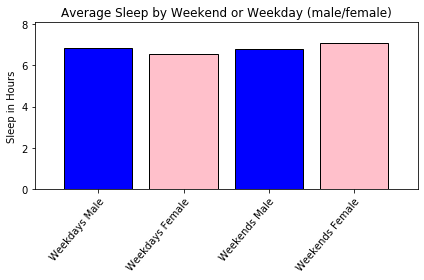

In [292]:
# bar chart for average sleep by weekend/weekday for single male & female data
x_axis = avg_df["Weekday or Weekend"]
y_axis = avg_df["Average"]

plt.figure(figsize=(6,4))
plt.bar(x_axis, y_axis, color=["blue","pink","blue","pink"],edgecolor='black')
plt.xticks(rotation=50, ha="right", rotation_mode="anchor")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)
plt.ylabel("Sleep in Hours")
plt.title("Average Sleep by Weekend or Weekday (male/female)")
plt.tight_layout()
plt.savefig("figures/avg_mf_wkewkd_jb.png")
plt.show()


## Average sleep on Weekdays and Weekends (all)

In [293]:
# avg sleep_efficiency weekend
both_avg_weekends = sleep_efficiency_new_2[sleep_efficiency_new_2["WeekdayWeekend"]== "Date is Weekend"]
bwavg = both_avg_weekends["SleepDuration"].mean()
bw = bwavg * 60

In [294]:
# avg american_sleep weekend
am_avg_weekends = am_sleep_sx[am_sleep_sx["Type of Days"]== "Weekend days and holidays"]
amwavg = am_avg_weekends["Avg hrs per day sleeping"].mean()
awe = amwavg*60

In [295]:
# combine the two averages 
mf_avg_weekend = (bw+awe) /2 /60
mf_avg_weekend
r_mf_avg_weekend = mf_avg_weekend.round(2)
r_mf_avg_weekend
# "%02d:%02d" % (divmod(mf_avg_weekend, 60)) + ", weekend average in hours and minutes"

8.41

In [296]:
# avg sleep_efficiency weekday
both_avg_weekdays = sleep_efficiency_new_2[sleep_efficiency_new_2["WeekdayWeekend"]== "Date is Weekday"]
bwdavg = both_avg_weekdays["SleepDuration"].mean()
bd = bwdavg*60

In [297]:
# avg american_sleep weekday
am_avg_weekdays = am_sleep_sx[am_sleep_sx["Type of Days"]== "Nonholiday weekdays"]
amwdavg = am_avg_weekdays["Avg hrs per day sleeping"].mean()
aw = amwdavg*60

In [298]:
# combine the two averages 
mf_avg_weekday = (bd+aw)/2/60
mf_avg_weekday
r_mf_avg_weekday = mf_avg_weekday.round(2)
r_mf_avg_weekday
# "%02d:%02d" % (divmod(mf_avg_weekday, 60)) + ", weekday average in hours and minutes"

7.93

In [299]:
# dataframe for bar chart
b_avg_df = pd.DataFrame({"Weekday or Weekend":["Weekdays","Weekends"], 
                       "Average":[r_mf_avg_weekday,r_mf_avg_weekend]})
b_avg_df

,Weekday or Weekend,Average
0,Weekdays,7.93
1,Weekends,8.41


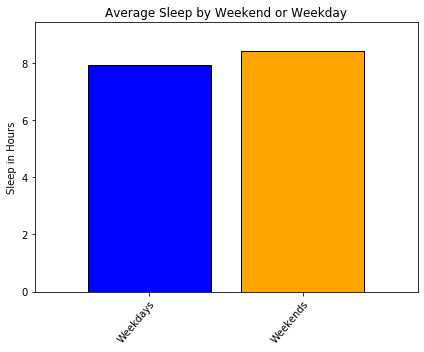

In [300]:
# bar chart for average sleep by weekend/weekday
xaxis = b_avg_df["Weekday or Weekend"]
yaxis = b_avg_df["Average"]

plt.figure(figsize=(6,5))
plt.bar(xaxis, yaxis, color=["blue","orange"],edgecolor='black')
plt.xticks(rotation=50, ha="right", rotation_mode="anchor")
plt.xlim(-0.75, len(xaxis)-0.25)
plt.ylim(0, max(yaxis)+1)
plt.ylabel("Sleep in Hours")
plt.title("Average Sleep by Weekend or Weekday")
plt.tight_layout()
plt.savefig("figures/avg_wkewkd_jb.png")
plt.show()


## Summary Statistics by Age Group

In [301]:
am_age_group_ss = am_sleep_sx.groupby(["Age Group"]).agg({"Avg hrs per day sleeping":["mean","median","var","std","sem"]})

am_age_group_ss

Avg hrs per day sleeping                             \
                                      mean median       var       std   
Age Group                                                               
15 to 24 years                    9.499556  9.345  0.271321  0.520885   
25 to 34 years                    8.792778  8.670  0.284933  0.533791   
35 to 44 years                    8.585333  8.410  0.257486  0.507431   
45 to 54 years                    8.483556  8.370  0.245070  0.495046   
55 to 64 years                    8.508778  8.420  0.121316  0.348305   
65 years and over                 8.965111  8.955  0.025690  0.160282   

                             
                        sem  
Age Group                    
15 to 24 years     0.054906  
25 to 34 years     0.056266  
35 to 44 years     0.053488  
45 to 54 years     0.052182  
55 to 64 years     0.036715  
65 years and over  0.016895

In [302]:
se_age_group_ss = sleep_efficiency_new_2.groupby(["Age Group"]).agg({"SleepDuration":["mean","median","var","std","sem"]})
# "Awakenings":"mean"})
se_age_group_ss

SleepDuration                                     
                           mean median       var       std       sem
Age Group                                                           
15 to 24 years         7.584507    7.5  0.521328  0.722030  0.085689
25 to 34 years         7.524510    7.5  0.754344  0.868530  0.085997
35 to 44 years         7.447115    7.5  0.844263  0.918838  0.090099
45 to 54 years         7.350877    7.0  0.720928  0.849075  0.079523
55 to 64 years         7.464912    7.5  0.954104  0.976782  0.129378
65 years and over      7.625000    7.5  0.395833  0.629153  0.314576

In [303]:
# avg sleep_efficiency weekend by age group
se_age_avg_weekends = sleep_efficiency_new_2.loc[sleep_efficiency_new_2["WeekdayWeekend"]== "Date is Weekend"]
se_age_avg_weekends = se_age_avg_weekends.groupby(["Age Group"])
seavgwe = se_age_avg_weekends["SleepDuration"].mean()
seavgwe


Age Group
15 to 24 years       7.815789
25 to 34 years       7.629032
35 to 44 years       7.454545
45 to 54 years       7.140000
55 to 64 years       7.450000
65 years and over    7.666667
Name: SleepDuration, dtype: float64

In [304]:
# avg american_sleep weekend by age group
am_age_avg_weekends = am_sleep_sx.loc[am_sleep_sx["Type of Days"]== "Weekend days and holidays"]
am_age_avg_weekends = am_age_avg_weekends.groupby(["Age Group"])
amavgwe = am_age_avg_weekends["Avg hrs per day sleeping"].mean()
amavgwe


Age Group
15 to 24 years       10.136667
25 to 34 years        9.450333
35 to 44 years        9.232667
45 to 54 years        9.102000
55 to 64 years        8.944000
65 years and over     9.133333
Name: Avg hrs per day sleeping, dtype: float64

In [305]:
agav = (seavgwe+amavgwe)/2
agegroup_avg = agav.round(2)
agegroup_avg

Age Group
15 to 24 years       8.98
25 to 34 years       8.54
35 to 44 years       8.34
45 to 54 years       8.12
55 to 64 years       8.20
65 years and over    8.40
dtype: float64

In [306]:
# avg sleep_efficiency weekday by age group
se_age_avg_weekdays = sleep_efficiency_new_2.loc[sleep_efficiency_new_2["WeekdayWeekend"]== "Date is Weekday"]
se_age_avg_weekdays = se_age_avg_weekdays.groupby(["Age Group"])
seavgwd = se_age_avg_weekdays["SleepDuration"].mean()
seavgwd

Age Group
15 to 24 years       7.500000
25 to 34 years       7.478873
35 to 44 years       7.443662
45 to 54 years       7.410112
55 to 64 years       7.472973
65 years and over    7.500000
Name: SleepDuration, dtype: float64

In [307]:
# avg american_sleep weekday by age group
am_age_avg_weekdays = am_sleep_sx.loc[am_sleep_sx["Type of Days"]== "Nonholiday weekdays"]
am_age_avg_weekdays = am_age_avg_weekdays.groupby(["Age Group"])
amavgwd = am_age_avg_weekdays["Avg hrs per day sleeping"].mean()
amavgwd

Age Group
15 to 24 years       9.013667
25 to 34 years       8.291333
35 to 44 years       8.092000
45 to 54 years       8.012000
55 to 64 years       8.177667
65 years and over    8.837333
Name: Avg hrs per day sleeping, dtype: float64

In [308]:
agava = (seavgwd+amavgwd)/2
agegroup_avga = agava.round(2)
agegroup_avga

Age Group
15 to 24 years       8.26
25 to 34 years       7.89
35 to 44 years       7.77
45 to 54 years       7.71
55 to 64 years       7.83
65 years and over    8.17
dtype: float64

In [309]:
# dataframe for age group bar chart by weekday
age_avga_df = pd.DataFrame({"Age Group":['15 to 24 years', '25 to 34 years', '35 to 44 years',\
                                        '45 to 54 years', '55 to 64 years', '65 years and over'],\
                                        "Average":[8.26, 7.89, 7.77, 7.71, 7.83, 8.17]})
age_avga_df

,Age Group,Average
0,15 to 24 years,8.26
1,25 to 34 years,7.89
2,35 to 44 years,7.77
3,45 to 54 years,7.71
4,55 to 64 years,7.83
5,65 years and over,8.17


In [310]:
# dataframe for age group bar chart by weekend
age_avg_df = pd.DataFrame({"Age Group":['15 to 24 years', '25 to 34 years', '35 to 44 years',\
                                        '45 to 54 years', '55 to 64 years', '65 years and over'],\
                                        "Average":[8.98, 8.54, 8.34, 8.12, 8.20, 8.40]})
age_avg_df

,Age Group,Average
0,15 to 24 years,8.98
1,25 to 34 years,8.54
2,35 to 44 years,8.34
3,45 to 54 years,8.12
4,55 to 64 years,8.20
5,65 years and over,8.40


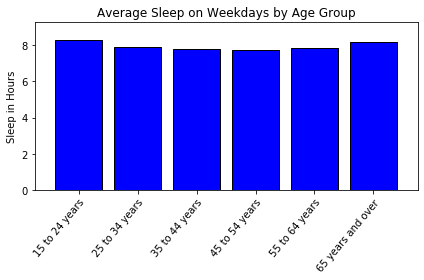

In [311]:
# bar chart for average sleep by weekday by age group
xaxis = age_avga_df["Age Group"]
yaxis = age_avga_df["Average"]

plt.figure(figsize=(6,4))
plt.bar(xaxis, yaxis, color="blue", edgecolor='black')
plt.xticks(rotation=50, ha="right", rotation_mode="anchor")
plt.xlim(-0.75, len(xaxis)-0.25)
plt.ylim(0, max(yaxis)+1)
plt.ylabel("Sleep in Hours")
plt.title("Average Sleep on Weekdays by Age Group")
plt.tight_layout()
plt.savefig("figures/avg_age_wkd_jb.png")
plt.show()


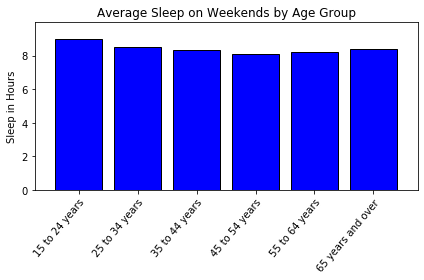

In [312]:
# bar chart for average sleep by weekend by age group
xaxis = age_avg_df["Age Group"]
yaxis = age_avg_df["Average"]

plt.figure(figsize=(6,4))
plt.bar(xaxis, yaxis, color="blue",edgecolor='black')
plt.xticks(rotation=50, ha="right", rotation_mode="anchor")
plt.xlim(-0.75, len(xaxis)-0.25)
plt.ylim(0, max(yaxis)+1)
plt.ylabel("Sleep in Hours")
plt.title("Average Sleep on Weekends by Age Group")
plt.tight_layout()
plt.savefig("figures/avg_age_wke_jb.png")
plt.show()


## T-Tests

In [313]:
# population 1
test_ttest_wkend = sleep_efficiency_new_2.loc[sleep_efficiency_new_2["WeekdayWeekend"]== "Date is Weekend", "SleepDuration"]
# population 2
test_ttest_wkday = sleep_efficiency_new_2.loc[sleep_efficiency_new_2["WeekdayWeekend"]== "Date is Weekday", "SleepDuration"]

# ttest for sleep_efficiency weekday vs weekend populations
st.ttest_ind(test_ttest_wkday, test_ttest_wkend, equal_var=False)


Ttest_indResult(statistic=-0.40000330675383583, pvalue=0.6895402640949051)

In [314]:
# population 1
test2_ttest_wkend = am_sleep_sx.loc[am_sleep_sx["Type of Days"]== "Weekend days and holidays", "Avg hrs per day sleeping"]
# population 2
test2_ttest_wkday = am_sleep_sx.loc[am_sleep_sx["Type of Days"]== "Nonholiday weekdays", "Avg hrs per day sleeping"]

# ttest for american_sleep weekday vs weekend populations
st.ttest_ind(test2_ttest_wkday, test2_ttest_wkend, equal_var=False)
# this is the only one that would be statistically relevant, but I have been "merging" this data set and the one above together and averaging them 
# I would maybe just use this data set in the future for analysis to see if I could find some interesting insights

Ttest_indResult(statistic=-20.693470445628908, pvalue=3.994015201904239e-63)

In [315]:
# population 1
test3_ttest_wkend = male_sleep_new.loc[male_sleep_new["WeekdayWeekend"]== "Date is Weekend", "MinutesAsleep"]
# population 2
test3_ttest_wkday = female_sleep_new_2.loc[female_sleep_new_2["WeekdayWeekend"]== "Date is Weekend", "MinutesAsleep"]

# ttest for weekend male vs female populations
st.ttest_ind(test3_ttest_wkday, test3_ttest_wkend, equal_var=False)


Ttest_indResult(statistic=1.0757109933738704, pvalue=0.28409048436514683)

In [316]:
# population 1
test4_ttest_wkend = male_sleep_new.loc[male_sleep_new["WeekdayWeekend"]== "Date is Weekday", "MinutesAsleep"]
# population 2
test4_ttest_wkday = female_sleep_new_2.loc[female_sleep_new_2["WeekdayWeekend"]== "Date is Weekday", "MinutesAsleep"]

# ttest for weekday male vs female populations
st.ttest_ind(test4_ttest_wkday, test4_ttest_wkend, equal_var=False)


Ttest_indResult(statistic=-1.2463598993211835, pvalue=0.21348497087906734)

In [317]:
# population 1
test5_ttest_wkend = sleep_efficiency_new_2.loc[sleep_efficiency_new_2["Age"]>40, "SleepDuration"]
# population 2
test5_ttest_wkday = sleep_efficiency_new_2.loc[sleep_efficiency_new_2["Age"]<=40, "SleepDuration"]

# ttest for sleep_efficiency weekday vs weekend populations
st.ttest_ind(test5_ttest_wkday, test5_ttest_wkend, equal_var=False)


Ttest_indResult(statistic=1.1975406835478246, pvalue=0.23174487586702067)

### Last-minute testing

In [318]:
# avg sleep_efficiency weekday
efficiency_avg_weekdays = sleep_efficiency_new_2[sleep_efficiency_new_2["WeekdayWeekend"]== "Date is Weekday"]
newn = efficiency_avg_weekdays["SleepEfficiency"].mean()
newn


0.7859501557632399

In [319]:
# avg sleep_efficiency weekend
efficiency_avg_weekends = sleep_efficiency_new_2[sleep_efficiency_new_2["WeekdayWeekend"]== "Date is Weekend"]
newnn = efficiency_avg_weekends["SleepEfficiency"].mean()
newnn


0.7961832061068702

In [320]:
# dataframe for bar chart
efficiency_avg_df = pd.DataFrame({"Weekday or Weekend":["Weekdays","Weekends"], 
                       "Sleep Efficiency Average":[newn,newnn]})
efficiency_avg_df

,Weekday or Weekend,Sleep Efficiency Average
0,Weekdays,0.785950
1,Weekends,0.796183


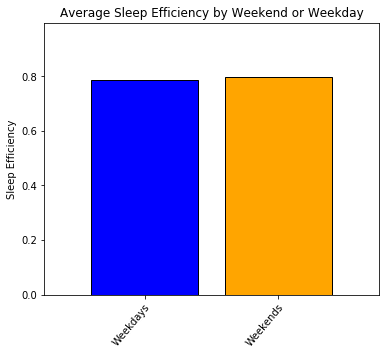

In [321]:
# bar chart for average sleep efficiency by weekend/weekday
xxaxis = efficiency_avg_df["Weekday or Weekend"]
yyaxis = efficiency_avg_df["Sleep Efficiency Average"]

plt.figure(figsize=(6,5))
plt.bar(xxaxis, yyaxis, color=["blue","orange"],edgecolor='black')
plt.xticks(rotation=50, ha="right", rotation_mode="anchor")
plt.xlim(-0.75, len(xxaxis)-0.25)
plt.ylim(0, max(yyaxis)+.2)
plt.ylabel("Sleep Efficiency")
plt.title("Average Sleep Efficiency by Weekend or Weekday")
# plt.savefig("/figures/efficiency_avg_wkewkd_jb.png")
plt.show()


In [322]:
# population 1
test6_ttest_wkend = sleep_efficiency_new_2.loc[sleep_efficiency_new_2["WeekdayWeekend"]== "Date is Weekend", "SleepEfficiency"]
# population 2
test6_ttest_wkday = sleep_efficiency_new_2.loc[sleep_efficiency_new_2["WeekdayWeekend"]== "Date is Weekday", "SleepEfficiency"]

# ttest for actual sleep efficiency weekday vs weekend populations
st.ttest_ind(test6_ttest_wkday, test6_ttest_wkend, equal_var=False)


Ttest_indResult(statistic=-0.7607399426902268, pvalue=0.4474884644953805)